# Mouse Neuropixel Analysis through AllenSDK.
The purpose of this script is to pull NWB files from allensdk and explore the imaging portion. This code should pull mouse neuropixel data using the AllenSDK package. This script also seeks to act as a visualization tool for the different images/videos contained within the study. The individual unit spike trains will also be visualized.\
-Open the ecephys project's whole dataset. \
-Choose a session to be looked at in greater detail. \
-Explore the visual stimulus presented in that dataset.\
-Explore individual unit spike trains for the chosen session.

A link to the original white paper can be found at https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels. \
Helpful visualizations https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_session.html#Querying-across-probes.

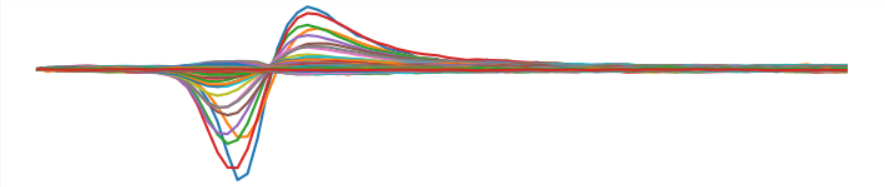

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from pathlib import Path
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
# Show all columns
pd.set_option('display.max_columns', None)

### Open the entire Ecephys Project Dataset.

In [2]:
### Open the entire dataset.

# Set output directory to '/local1/ecephys_cache_dir'
output_dir = '/local1/ecephys_cache_dir' # must be updated to a valid directory in your filesystem
# Set DOWNLOAD_COMPLETE_DATASET to True
DOWNLOAD_COMPLETE_DATASET = True
# Create a file path to the manifest.json file within the output directory
manifest_path = os.path.join(output_dir, "manifest.json")
# Create an instance of the EcephysProjectCache class with the manifest file path as argument
cache = EcephysProjectCache(manifest=manifest_path)

In [3]:
# Look at sessions that we can pull form the Ecyphys Project.
ecyphys_project = cache.get_session_table()

print('Total number of sessions: ' + str(len(ecyphys_project)))
ecyphys_project.head()

Total number of sessions: 58


published_at  specimen_id           session_type  \
id                                                                    
715093703  2019-10-03T00:00:00Z    699733581  brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284  brain_observatory_1.1   
721123822  2019-10-03T00:00:00Z    707296982  brain_observatory_1.1   
732592105  2019-10-03T00:00:00Z    717038288  brain_observatory_1.1   
737581020  2019-10-03T00:00:00Z    718643567  brain_observatory_1.1   

           age_in_days sex                                    full_genotype  \
id                                                                            
715093703        118.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
719161530        122.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
721123822        125.0   M  Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
732592105        100.0   M                                            wt/wt   
737581020        108.0   M                                            wt/wt   

           unit_count  channel_count  probe_count  \
id                                                  
715093703         884           2219            6   
719161530         755           2214            6   
721123822         444           2229            6   
732592105         824           1847            5   
737581020         568           2218            6   

                                  ecephys_structure_acronyms  
id                                                            
715093703  [CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ...  
719161530  [TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N...  
721123822  [MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ...  
732592105       [grey, VISpm, nan, VISp, VISl, VISal, VISrl]  
737581020      [grey, VISmma, nan, VISpm, VISp, VISl, VISrl]

In [4]:
# Filter sessions. The filter here was given by the template.
filtered_sessions = ecyphys_project[(ecyphys_project.sex == 'M') & \
                             (ecyphys_project.full_genotype.str.find('Sst') > -1) & \
                             (ecyphys_project.session_type == 'brain_observatory_1.1') & \
                             (['VISl' in acronyms for acronyms in 
                               ecyphys_project.ecephys_structure_acronyms])]

filtered_sessions.head()

published_at  specimen_id           session_type  \
id                                                                    
715093703  2019-10-03T00:00:00Z    699733581  brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284  brain_observatory_1.1   
756029989  2019-10-03T00:00:00Z    734865738  brain_observatory_1.1   

           age_in_days sex                                  full_genotype  \
id                                                                          
715093703        118.0   M  Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
719161530        122.0   M  Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
756029989         96.0   M  Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   

           unit_count  channel_count  probe_count  \
id                                                  
715093703         884           2219            6   
719161530         755           2214            6   
756029989         684           2214            6   

                                  ecephys_structure_acronyms  
id                                                            
715093703  [CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ...  
719161530  [TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N...  
756029989  [TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS...

In [5]:
# Get unit info
units = cache.get_units()

print('Total number of units: ' + str(len(units)))
units

Total number of units: 40010


waveform_PT_ratio  waveform_amplitude  amplitude_cutoff  \
id                                                                   
915956282           0.611816          164.878740          0.072728   
915956340           0.439372          247.254345          0.000881   
915956345           0.500520          251.275830          0.001703   
915956349           0.424620          177.115380          0.096378   
915956356           0.512847          214.954545          0.054706   
...                      ...                 ...               ...   
951911942           0.368040          189.249060          0.001083   
951911948           0.660350           80.706600          0.000416   
951911955           0.357672          117.232440          0.023316   
951911961           0.263957           82.125030          0.032783   
951912003           0.317090           80.636010          0.011388   

           cumulative_drift   d_prime  waveform_duration  ecephys_channel_id  \
id                                                                             
915956282            309.71  3.910873           0.535678           850229419   
915956340            160.24  5.519024           0.563149           850229419   
915956345            129.36  3.559911           0.521943           850229419   
915956349            169.29  2.973959           0.508208           850229419   
915956356            263.01  2.936851           0.549414           850229419   
...                     ...       ...                ...                 ...   
951911942            122.82  5.362617           0.631826           850103120   
951911948            108.17  3.507884           0.302178           850103122   
951911955            336.04  2.790057           0.714238           850103126   
951911961            361.88  2.954858           0.769179           850103134   
951912003            249.96  3.086359           0.782915           850103100   

           firing_rate  waveform_halfwidth  isi_violations  \
id                                                           
915956282     6.519432            0.164824        0.104910   
915956340     9.660554            0.206030        0.006825   
915956345    12.698430            0.192295        0.044936   
915956349    16.192413            0.192295        0.120715   
915956356     2.193113            0.233501        0.430427   
...                ...                 ...             ...   
951911942     0.984659            0.192295        0.080230   
951911948    10.327972            0.233501        0.000365   
951911955     1.782535            0.192295        0.318256   
951911961     3.211115            0.247236        0.497900   
951912003     2.196052            0.219765        0.056454   

           isolation_distance   L_ratio  max_drift  nn_hit_rate  nn_miss_rate  \
id                                                                              
915956282           30.546900  0.013865      27.10     0.898126      0.001599   
915956340           59.613182  0.000410       7.79     0.987654      0.000903   
915956345           47.805714  0.008281      11.56     0.930000      0.004956   
915956349           54.635515  0.010406      14.87     0.874667      0.021636   
915956356           18.136302  0.061345      18.37     0.637363      0.000673   
...                       ...       ...        ...          ...           ...   
951911942           44.613231  0.009189      58.14     0.870175      0.000236   
951911948           44.881251  0.098006      88.56     0.926667      0.009827   
951911955           35.913648  0.056284      30.87     0.647249      0.005071   
951911961           43.242614  0.042485      47.09     0.889333      0.007518   
951912003           47.192416  0.011265      67.15     0.863711      0.004525   

           presence_ratio  waveform_recovery_slope  \
id                                                   
915956282            0.99                -0.087545   
915956340            0.99           

In [6]:
analysis_metrics1 = cache.get_unit_analysis_metrics_by_session_type('brain_observatory_1.1')

print(str(len(analysis_metrics1)) + ' units in table 1')

21842 units in table 1


### Choose a specific session.

In [7]:
# Pick specific session.
session = cache.get_session_data(filtered_sessions.index.values[0],
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf
                                )
# Get spike times.
spike_times = session.spike_times
# Get specific stimulus table.
stimulus_table = session.get_stimulus_table("natural_scenes")

# Display objects within session.
print([attr_or_method for attr_or_method in dir(session) if attr_or_method[0] != '_'])

C:\Users\raywz\AppData\Roaming\Python\Python39\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1371: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "


['DETAILED_STIMULUS_PARAMETERS', 'LazyProperty', 'age_in_days', 'api', 'channel_structure_intervals', 'channels', 'conditionwise_spike_statistics', 'ecephys_session_id', 'from_nwb_path', 'full_genotype', 'get_current_source_density', 'get_inter_presentation_intervals_for_stimulus', 'get_invalid_times', 'get_lfp', 'get_parameter_values_for_stimulus', 'get_pupil_data', 'get_screen_gaze_data', 'get_stimulus_epochs', 'get_stimulus_parameter_values', 'get_stimulus_table', 'inter_presentation_intervals', 'invalid_times', 'mean_waveforms', 'metadata', 'num_channels', 'num_probes', 'num_stimulus_presentations', 'num_units', 'optogenetic_stimulation_epochs', 'presentationwise_spike_counts', 'presentationwise_spike_times', 'probes', 'rig_equipment_name', 'rig_geometry_data', 'running_speed', 'session_start_time', 'session_type', 'sex', 'specimen_name', 'spike_amplitudes', 'spike_times', 'stimulus_conditions', 'stimulus_names', 'stimulus_presentations', 'structure_acronyms', 'structurewise_unit_c

In [8]:
cache.get_channels()

ecephys_probe_id  local_index  probe_horizontal_position  \
id                                                                    
849705558         792645504            1                         11   
849705560         792645504            2                         59   
849705562         792645504            3                         27   
849705564         792645504            4                         43   
849705566         792645504            5                         11   
...                     ...          ...                        ...   
868937722         868929142          379                         27   
868937726         868929142          380                         43   
868937731         868929142          381                         11   
868937735         868929142          382                         59   
868937739         868929142          383                         27   

           probe_vertical_position  anterior_posterior_ccf_coordinate  \
id                                                                      
849705558                       20                             8165.0   
849705560                       40                             8162.0   
849705562                       40                             8160.0   
849705564                       60                             8157.0   
849705566                       60                             8155.0   
...                            ...                                ...   
868937722                     3800                             7385.0   
868937726                     3820                             7385.0   
868937731                     3820                             7384.0   
868937735                     3840                             7384.0   
868937739                     3840                             7383.0   

           dorsal_ventral_ccf_coordinate  left_right_ccf_coordinate  \
id                                                                    
849705558                         3314.0                     6862.0   
849705560                         3307.0                     6866.0   
849705562                         3301.0                     6871.0   
849705564                         3295.0                     6875.0   
849705566                         3288.0                     6879.0   
...                                  ...                        ...   
868937722                         -135.0                     9601.0   
868937726                         -142.0                     9604.0   
868937731                         -149.0                     9608.0   
868937735                         -156.0                     9611.0   
868937739                         -164.0                     9615.0   

           ecephys_structure_id ecephys_structure_acronym  ecephys_session_id  \
id                                                                              
849705558                 215.0                       APN           779839471   
849705560                 215.0                       APN           779839471   
849705562                 215.0                       APN           779839471   
849705564                 215.0                       APN           779839471   
849705566                 215.0                       APN           779839471   
...                         ...                       ...                 ...   
868937722                   NaN                       NaN           839068429   
868937726                   NaN                       NaN           839068429   
868937731                   NaN                       NaN           839068429   
868937735                   NaN                       NaN           839068429   
868937739                   NaN                       NaN           839068429   

           lfp_sampling_rate phase  sampling_rate  has_lfp_data  unit_count  
id                                                                           
849

### Look at the visual stimulus presented for the session.

In [9]:
# Display objects within session.
print('Visual Stimulus for session', session.ecephys_session_id)
pd.unique(session.stimulus_presentations['stimulus_name'])

Visual Stimulus for session 715093703


array(['spontaneous', 'gabors', 'flashes', 'drifting_gratings',
       'natural_movie_three', 'natural_movie_one', 'static_gratings',
       'natural_scenes'], dtype=object)

In [10]:
# Choose the natural scenes portion of the dataset.
natural_scenes = session.stimulus_presentations[session.stimulus_presentations['stimulus_name'] == 'natural_scenes']
np.sort(pd.unique(natural_scenes['frame']))
natural_scenes

color contrast  frame orientation phase  size  \
stimulus_presentation_id                                                 
51353                     null     null    5.0        null  null  null   
51354                     null     null  114.0        null  null  null   
51355                     null     null   13.0        null  null  null   
51356                     null     null   70.0        null  null  null   
51357                     null     null   26.0        null  null  null   
...                        ...      ...    ...         ...   ...   ...   
68222                     null     null   24.0        null  null  null   
68223                     null     null  107.0        null  null  null   
68224                     null     null  100.0        null  null  null   
68225                     null     null   76.0        null  null  null   
68226                     null     null   77.0        null  null  null   

                         spatial_frequency   start_time stimulus_block  \
stimulus_presentation_id                                                 
51353                                 null  5892.415053            9.0   
51354                                 null  5892.665249            9.0   
51355                                 null  5892.915445            9.0   
51356                                 null  5893.165641            9.0   
51357                                 null  5893.415837            9.0   
...                                    ...          ...            ...   
68222                                 null  8550.902302           13.0   
68223                                 null  8551.152520           13.0   
68224                                 null  8551.402739           13.0   
68225                                 null  8551.652957           13.0   
68226                                 null  8551.903166           13.0   

                           stimulus_name    stop_time temporal_frequency  \
stimulus_presentation_id                                                   
51353                     natural_scenes  5892.665249               null   
51354                     natural_scenes  5892.915445               null   
51355                     natural_scenes  5893.165641               null   
51356                     natural_scenes  5893.415837               null   
51357                     natural_scenes  5893.666049               null   
...                                  ...          ...                ...   
68222                     natural_scenes  8551.152520               null   
68223                     natural_scenes  8551.402739               null   
68224                     natural_scenes  8551.652957               null   
68225                     natural_scenes  8551.903166               null   
68226                     natural_scenes  8552.153375               null   

                         x_position y_position  duration  \
stimulus_presentation_id                                   
51353                          null       null  0.250196   
51354                          null       null  0.250196   
51355                          null       null  0.250196   
51356                          null       null  0.250196   
51357                          null       null  0.250211   
...                             ...        ...       ...   
68222                          null       null  0.250219   
68223                          null       null  0.250219   
68224                          null       null  0.250219   
68225                          null       null  0.250209   
68226                          null       null  0.250209   

                          stimulus_condition_id  
stimulus_presentation_id                         
51353                                      4908  
51354                                      4909  
51355                                      4910  
51356                                      4911  
51357                        

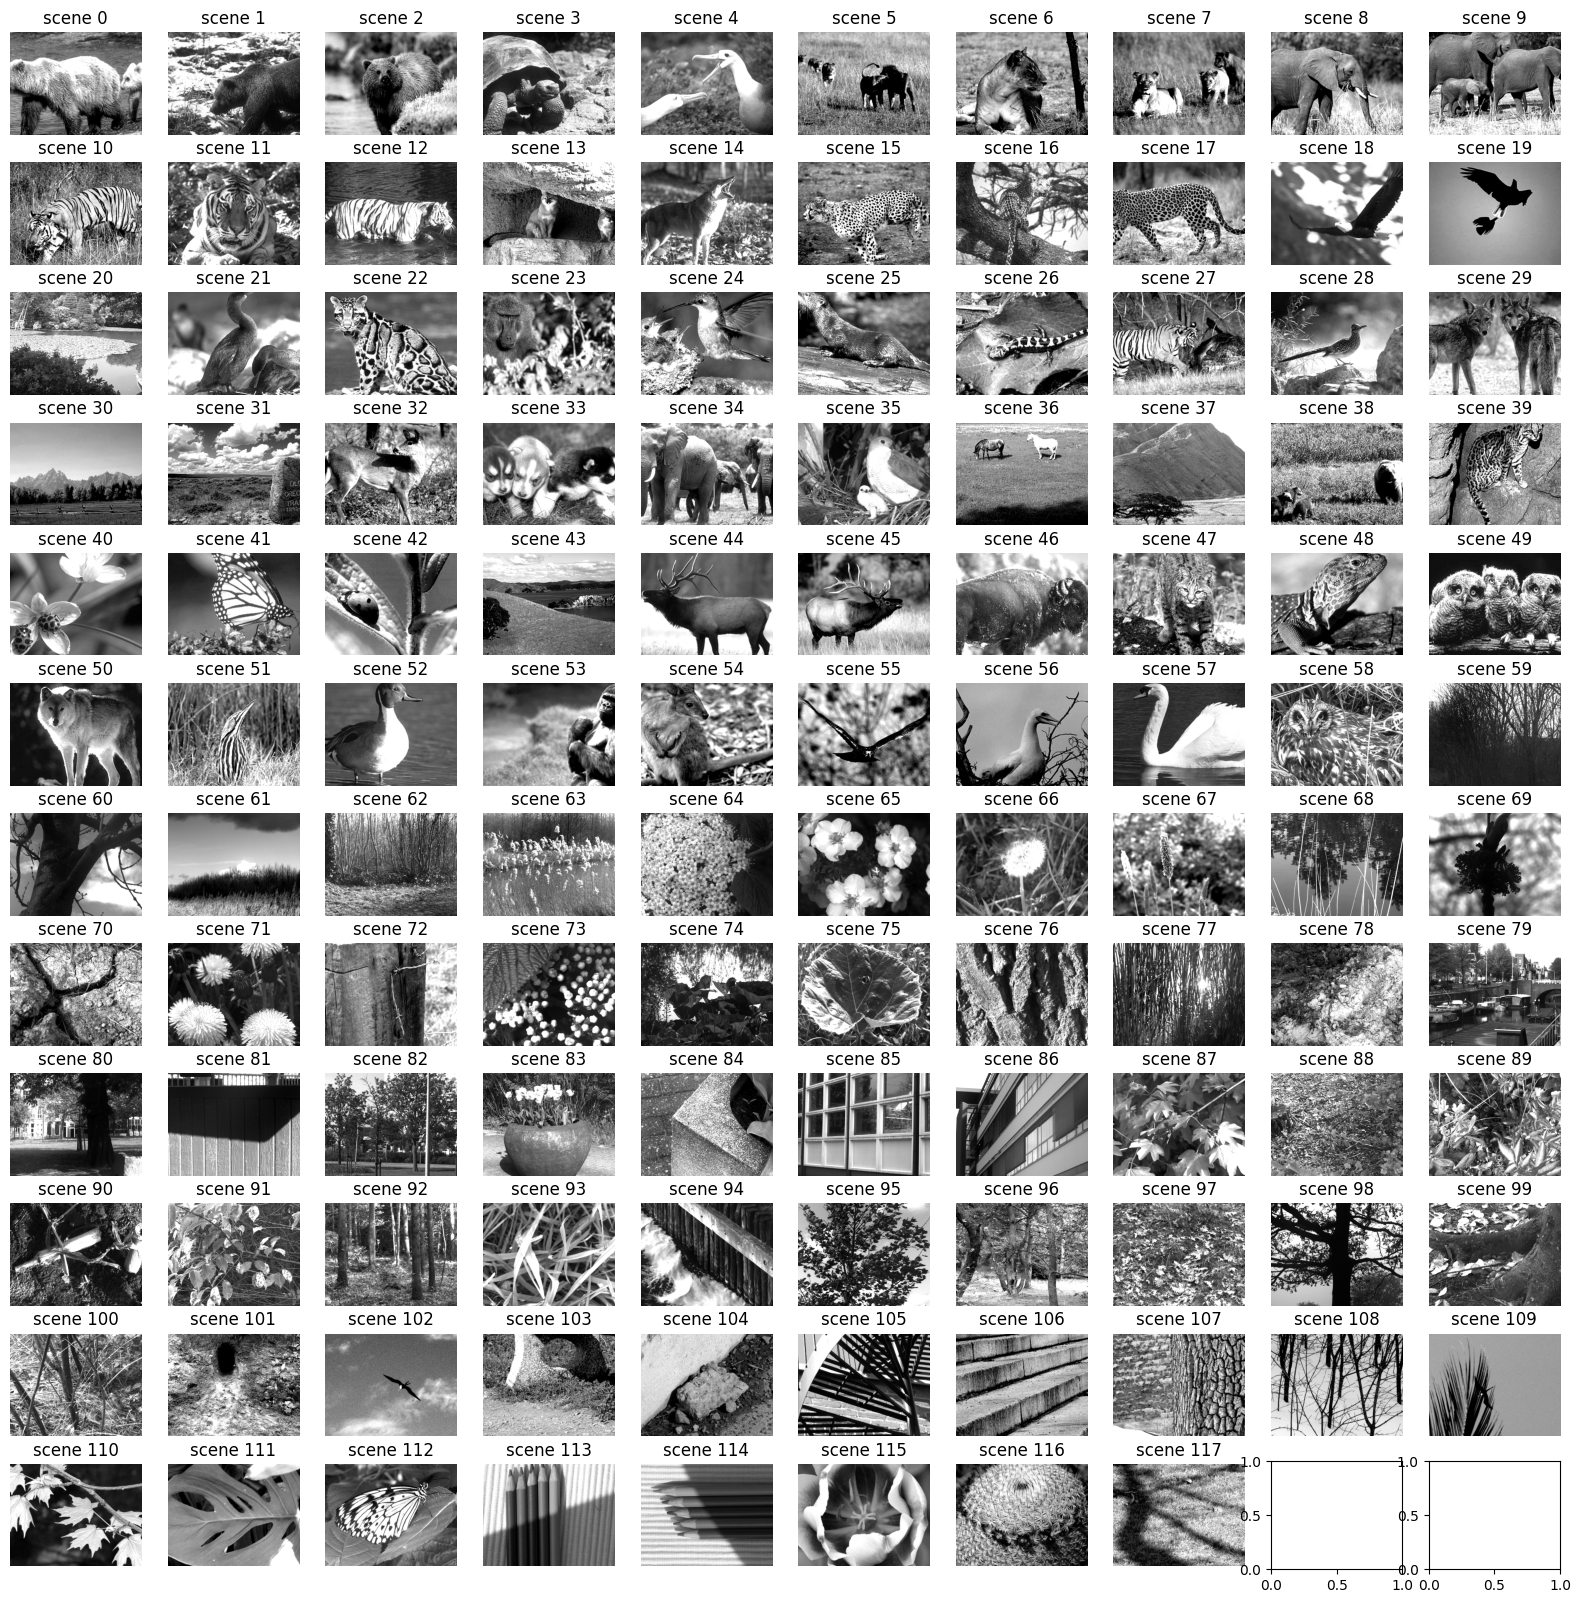

In [11]:
# Pull from where images are located.
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
data_set = boc.get_ophys_experiment_data(501498760)

# Show all scenes.
scene_nums = np.arange(0)

# read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

try:
    fig, axes = plt.subplots(12, 10, figsize=(20, 20))
    for i, ax in enumerate(axes.flat):
        ax.imshow(scenes[i], cmap='gray')
        ax.set_axis_off()
        ax.set_title('scene %d' % i)
except IndexError:
    pass # ignore the IndexError and continue running the code


In [12]:
scenes = data_set.get_stimulus_template('natural_scenes')

### Choose scenes to further explore.

In [13]:
### Choose specific scenes to explore.
scene_nums = [1, 55, 73, 100, 112]

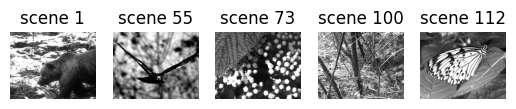

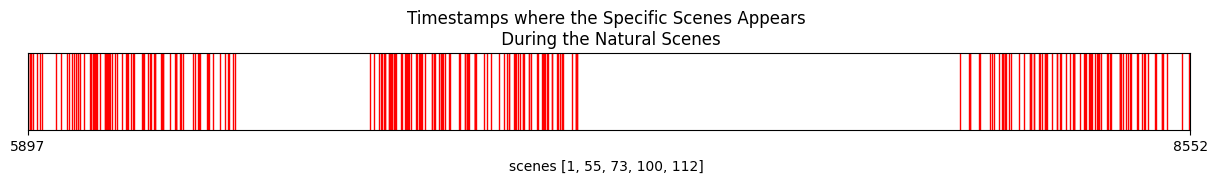

In [14]:
### Thank you to http://alleninstitute.github.io/AllenSDK/_static/examples/nb/brain_observatory_stimuli.html for this chunk.
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
data_set = boc.get_ophys_experiment_data(501498760)

# read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

# Define a function that takes two arguments: a dataframe containing information about stimulus trials and a title for the plot.
# The function plots the times each specified stimulus occurs throught the timeframe.
def plot_stimulus_table(natural_scenes, title):
    fstart = natural_scenes.start_time.min()
    fend = natural_scenes.stop_time.max()
    
    fig = plt.figure(figsize=(15,1))
    ax = fig.gca()
    # Loop over each trial in the dataframe
    for i, trial in natural_scenes.iterrows():    
        # Calculate the start and stop times for the trial.
        x1 = float(trial.start_time - fstart) / (fend - fstart)
        x2 = float(trial.stop_time - fstart) / (fend - fstart)      
        # Add a rectangle to the plot.
        ax.add_patch(patches.Rectangle((x1, 0.0), x2 - x1, 1.0, color='r'))
        
    ax.set_xticks((0,1))
    ax.set_xticklabels((int(np.round(fstart)), int(np.round(fend))))
    ax.set_yticks(())
    ax.set_title("Timestamps where the Specific Scenes Appears \n During the Natural Scenes")
    ax.set_xlabel(title)

# read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

# display a couple of the scenes
fig, axes = plt.subplots(1,len(scene_nums))
for ax,scene in zip(axes, scene_nums):
    ax.imshow(scenes[scene,:,:], cmap='gray')
    ax.set_axis_off()
    ax.set_title('scene %d' % scene)
    
# build up a mask of trials for which one of a list of scenes is visible
trial_mask = natural_scenes.frame == -2
for scene in scene_nums:
    trial_mask |= (natural_scenes.frame == scene)
natural_scenes = natural_scenes[trial_mask]

# plot the trials
plot_stimulus_table(natural_scenes, "scenes %s " % scene_nums)

### Visualize individual units

In [15]:
# Assuming you have an EcephysSession object named 'session'
available_unit_ids = session.spike_times.keys()

# Retrieve spike times for all available units
all_spike_times = {unit_id: session.spike_times[unit_id] for unit_id in available_unit_ids}
#all_spike_times.keys()

In [16]:
# Show data for one unit.
all_spike_times[950910332]

array([  51.63366736,  153.21330076,  153.85076847, ..., 9615.63732715,
       9615.75126066, 9615.80509407])

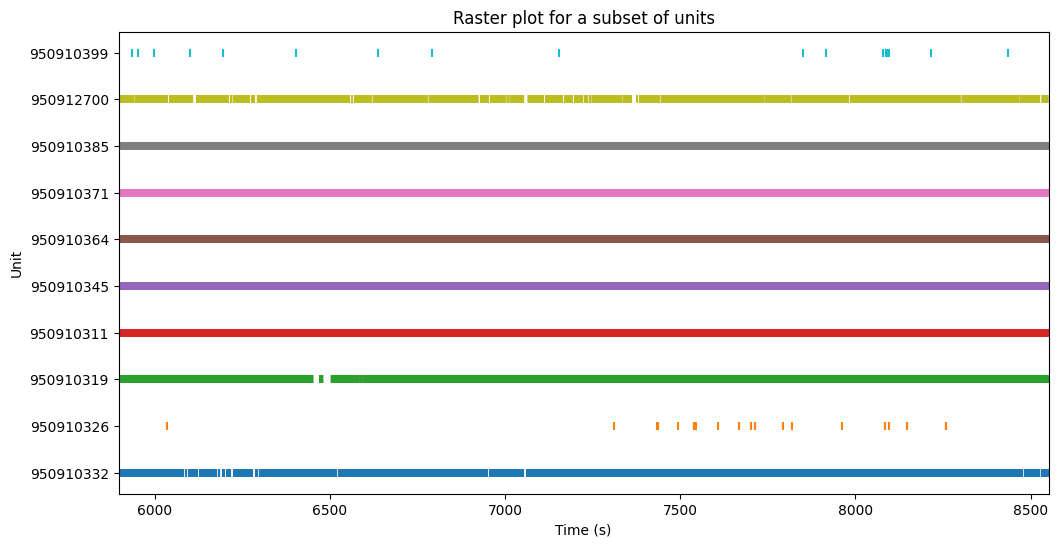

The following is the first 1000 timesteps of the data visualized. 1/30,000th of a second.
[0 1]


950910332  950910326  950910319  950910311  950910345  950910364  \
Time (s)                                                                        
5896.918780          0          0          0          0          0          0   
5896.918814          0          0          0          0          0          0   
5896.918847          0          0          0          0          0          0   
5896.918880          0          0          0          0          0          0   
5896.918914          0          0          0          0          0          0   
...                ...        ...        ...        ...        ...        ...   
5896.951914          0          0          0          0          0          0   
5896.951947          0          0          0          0          0          0   
5896.951980          0          0          0          0          0          0   
5896.952014          0          0          0          0          0          0   
5896.952047          0          0          0          0          0          0   

             950910371  950910385  950912700  950910399  
Time (s)                                                 
5896.918780          0          0          0          0  
5896.918814          0          0          0          0  
5896.918847          0          0          0          0  
5896.918880          0          0          0          0  
5896.918914          0          0          0          0  
...                ...        ...        ...        ...  
5896.951914          0          0          0          0  
5896.951947          0          0          0          0  
5896.951980          0          0          0          0  
5896.952014          0          0          0          0  
5896.952047          0          0          0          0  

[999 rows x 10 columns]

In [17]:
# Create a function to visualize spike data.
def visualize_spike_data(num_units_to_visualize, all_spike_times, units, start_time=0, end_time=10, num_timesteps=30):
    # Select a subset of units to plot
    available_unit_ids = list(all_spike_times.keys())
    subset_unit_ids = available_unit_ids[:num_units_to_visualize]

    # Calculate the time_interval (in seconds) from the first unit's sampling rate
    time_interval = 1 / units.iloc[0]['sampling_rate']

    # Create the raster plot
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, unit_id in enumerate(subset_unit_ids):
        spike_times = all_spike_times[unit_id]

        # Filter the spike times based on start_time and end_time
        filtered_spike_times = [t for t in spike_times if start_time <= t <= end_time]

        ax.scatter(filtered_spike_times, [i] * len(filtered_spike_times), marker='|')

    ax.set_xlim([start_time, end_time])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Unit')
    ax.set_yticks(range(len(subset_unit_ids)))
    ax.set_yticklabels(subset_unit_ids)
    ax.set_title('Raster plot for a subset of units')

    plt.show()

    # Create an array of time bins
    time_bins = np.arange(start_time, start_time + num_timesteps, time_interval)

    # Only consider the first 'num_timesteps' time bins
    time_bins = time_bins[:num_timesteps]

    # Initialize an empty DataFrame with the time bins as the index
    spike_counts_df = pd.DataFrame(index=time_bins[:-1])

    # Iterate through the units and count the spikes in each time bin
    for unit_id in subset_unit_ids:
        spike_times = all_spike_times[unit_id]
        spike_counts, _ = np.histogram(spike_times, bins=time_bins)
        spike_counts_df[unit_id] = spike_counts

    # Rename the index
    spike_counts_df.index.name = 'Time (s)'

    return spike_counts_df

# Example usage:
num_units_to_visualize = 10
start_time = natural_scenes.start_time.min()
end_time = natural_scenes.stop_time.max()
num_timesteps = 1000

spike_counts_df = visualize_spike_data(num_units_to_visualize, all_spike_times, units, start_time, end_time, num_timesteps)
print('The following is the first 1000 timesteps of the data visualized. 1/30,000th of a second.')
print(np.unique(spike_counts_df))
spike_counts_df

### Explore each neuron.

In [18]:
# get the x, y, and z positions of the units
units_info = session.units

# print the unit positions
print(units_info.columns)
units_info['firing_rate']

Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate',
       'isi_violations', 'isolation_distance', 'L_ratio', 'local_index',
       'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id',
       'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'probe_description', 'location', 'probe_sampling_rate',
       'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')


unit_id
950910332     1.736711
950910326     0.003733
950910319    12.713519
950910311    12.550090
950912689     0.608689
               ...    
950957020     2.121668
950957004     0.347530
950956952    19.358752
950957053     0.600978
950957039     1.659161
Name: firing_rate, Length: 2073, dtype: float64

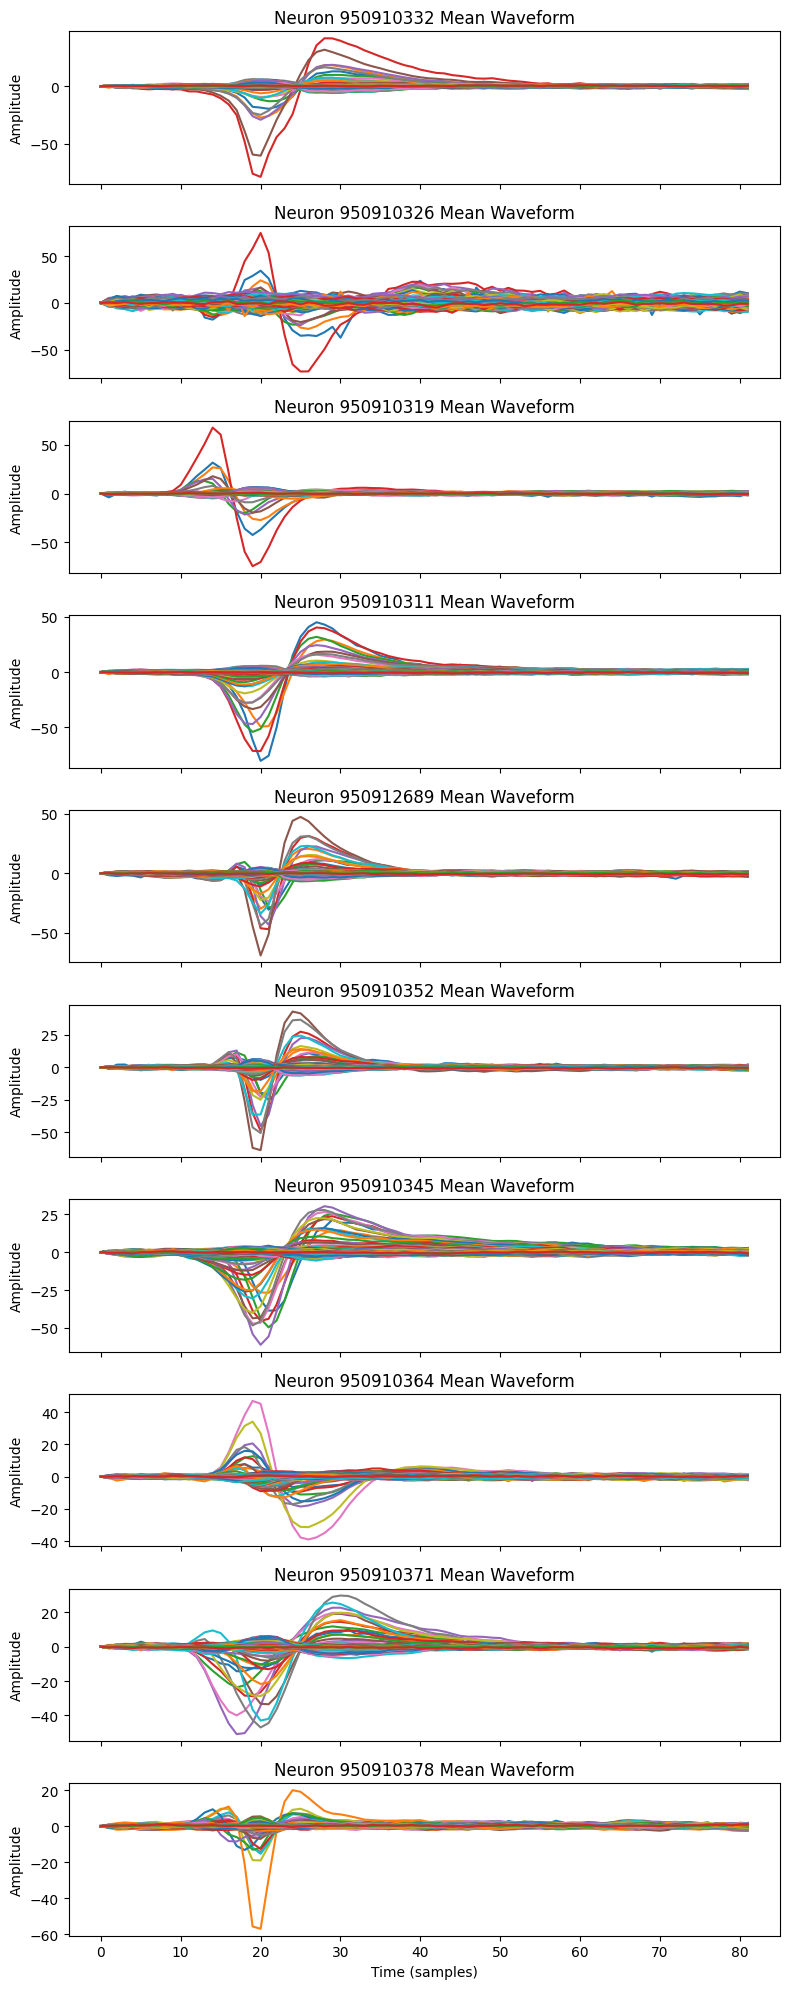

In [19]:
# Get the mean spike waveforms for each neuron
mean_waveforms = session.mean_waveforms

# Number of waveforms to display (you can change this value)
n_waveforms = 10
unit_ids = session.units.index.values

# Plot the mean spike waveforms for the first n_waveforms neurons
fig, axes = plt.subplots(n_waveforms, 1, figsize=(8, 2 * n_waveforms), sharex=True)
for i, (unit_id, ax) in enumerate(zip(unit_ids[:n_waveforms], axes)):
    waveform = mean_waveforms[unit_id]
    ax.plot(waveform.T)
    ax.set_title(f'Neuron {unit_id} Mean Waveform')
    ax.set_ylabel('Amplitude')
    ax.label_outer()

plt.xlabel('Time (samples)')
plt.tight_layout()
plt.show()


### Show Tuning Curves
Each neuron will fire at different rates depending on how the stimulus is oriented on a screen. This shows the fire rate on the y axis and the orientation on the x axis.
To further understand. https://www.youtube.com/watch?v=1xtBvnntsg8&ab_channel=rkp

- Thoughts on future model application, in an a ML model to group all neurons. The time before and time after parameters might be optimized to help group them based on picture. These groupings could then be mapped and functional connectivity shown through a network graph. This can be averaged or generalized amongst training images later down the road to map how one responds to viewing a general image. Like how one views a dog, cat, house, person, ect. This type of grouping might be a cheap resource to optimize as it is basically just taking an average firing rate while looking at an image.
- Possibly something similar to.... 

Neuron indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


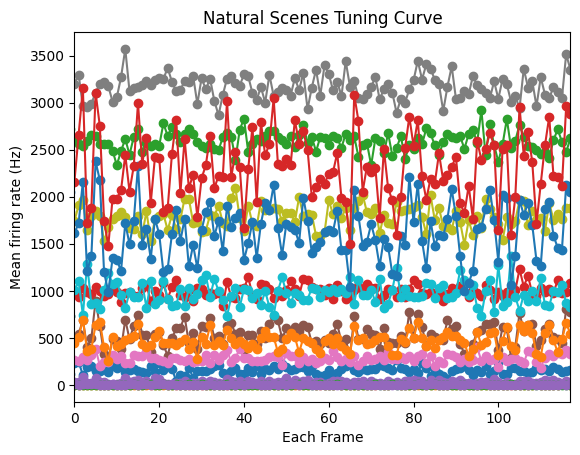

Neuron indices: [1]


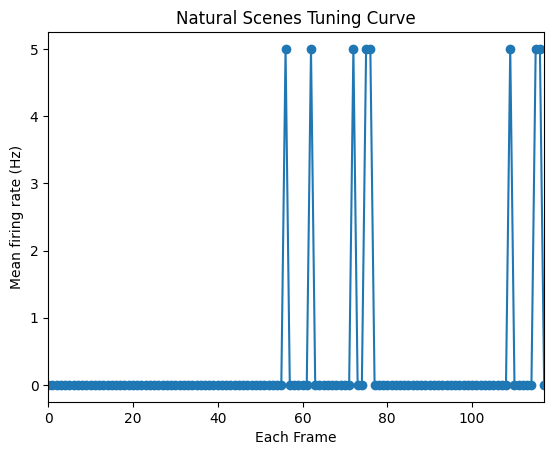

Neuron indices: [0, 4]


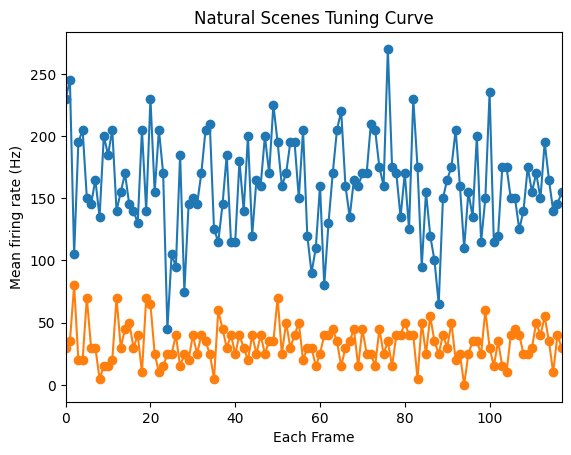

In [20]:
def image_tuning_curve(neuron_indices, spike_times, stimulus_table, time_before=0.1, time_after=0.3):
    # Find the unique stimulus frames presented during the experiment
    unique_frames = np.unique(stimulus_table['frame'].values)
    
    # Print neuron indices
    print(f"Neuron indices: {neuron_indices}")

    # Loop through each neuron index
    for neuron_index in neuron_indices:
        # Get the unit ID for the given neuron index
        unit_id = unit_ids[neuron_index]
        # Retrieve the spike times for the given neuron
        unit_spike_times = spike_times[unit_id]
        
        # Initialize a list to store the mean firing rate for each stimulus frame
        mean_firing_rates = []
    
        # Loop through each unique stimulus frame
        for frame in unique_frames:
            # Create a mask to select rows with the current frame in the stimulus table
            frame_mask = stimulus_table['frame'] == frame
            # Get the presentation start times for the current frame
            presentation_start_times = stimulus_table.loc[frame_mask, 'start_time'].values
            
            # Align the spike times relative to each presentation start time
            aligned_spike_times = [unit_spike_times - t for t in presentation_start_times]
            # Concatenate all aligned spike times into a single array
            all_spikes = np.concatenate(aligned_spike_times)
            
            # Compute the spike counts within the specified time window
            spike_counts, _ = np.histogram(all_spikes, bins=[-time_before, time_after])
            # Calculate the mean firing rate for the current frame
            mean_firing_rate = np.mean(spike_counts) / (time_after - time_before)
            
            # Append the mean firing rate to the list
            mean_firing_rates.append(mean_firing_rate)
    
        # Plot the tuning curve without the neuron index in the label
        plt.plot(unique_frames, mean_firing_rates, marker='o')

    # Label the x-axis and y-axis
    plt.xlabel("Each Frame")
    plt.ylabel("Mean firing rate (Hz)")

    # Add a title to the plot
    plt.title("Natural Scenes Tuning Curve")

    # Set x-axis limits
    plt.xlim(0, unique_frames[-1])

    # Show the plot
    plt.show()

# Example 
image_tuning_curve(np.arange(15), spike_times, stimulus_table)
image_tuning_curve([1], spike_times, stimulus_table)
image_tuning_curve([0, 4], spike_times, stimulus_table)

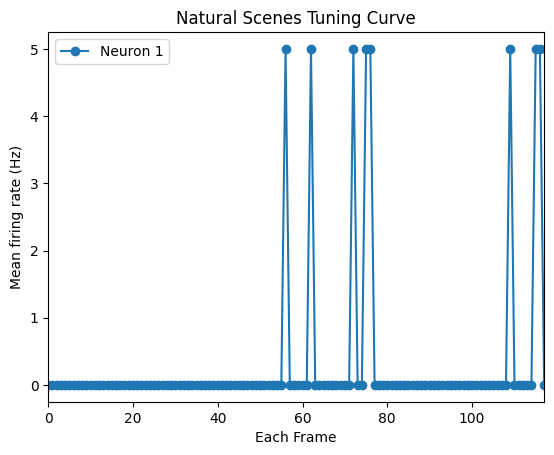

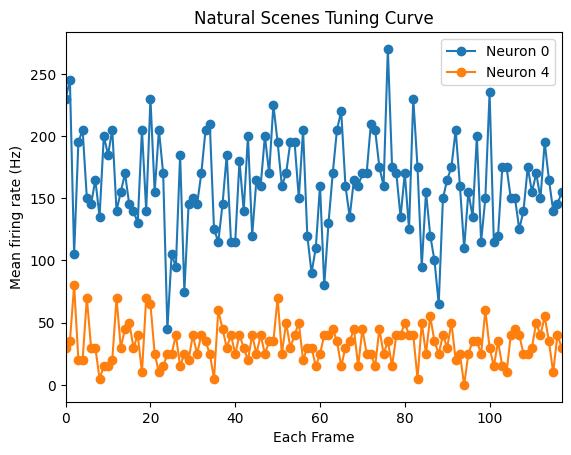

In [21]:
def image_tuning_curve(neuron_indices, spike_times, stimulus_table, bin_width=0.01, time_before=0.1, time_after=0.3):
    # Find the unique stimulus frames presented during the experiment
    unique_frames = np.unique(stimulus_table['frame'].values)
    
    # Loop through each neuron index
    for neuron_index in neuron_indices:
        # Get the unit ID for the given neuron index
        unit_id = unit_ids[neuron_index]
        # Retrieve the spike times for the given neuron
        unit_spike_times = spike_times[unit_id]
        
        # Initialize a list to store the mean firing rate for each stimulus frame
        mean_firing_rates = []
    
        # Loop through each unique stimulus frame
        for frame in unique_frames:
            # Create a mask to select rows with the current frame in the stimulus table
            frame_mask = stimulus_table['frame'] == frame
            # Get the presentation start times for the current frame
            presentation_start_times = stimulus_table.loc[frame_mask, 'start_time'].values
            
            # Align the spike times relative to each presentation start time
            aligned_spike_times = [unit_spike_times - t for t in presentation_start_times]
            # Concatenate all aligned spike times into a single array
            all_spikes = np.concatenate(aligned_spike_times)
            
            # Compute the spike counts within the specified time window
            spike_counts, _ = np.histogram(all_spikes, bins=[-time_before, time_after])
            # Calculate the mean firing rate for the current frame
            mean_firing_rate = np.mean(spike_counts) / (time_after - time_before)
            
            # Append the mean firing rate to the list
            mean_firing_rates.append(mean_firing_rate)
    
        # Plot the tuning curve
        plt.plot(unique_frames, mean_firing_rates, marker='o', label=f"Neuron {neuron_index}")

    # Label the x-axis and y-axis
    plt.xlabel("Each Frame")
    plt.ylabel("Mean firing rate (Hz)")

    # Add a title to the plot
    plt.title("Natural Scenes Tuning Curve")

    # Set x-axis limits
    plt.xlim(0, unique_frames[-1])

    # Add a legend to the plot
    plt.legend()

    # Show the plot
    plt.show()

# Example 
image_tuning_curve([1], spike_times, stimulus_table)
image_tuning_curve([0, 4], spike_times, stimulus_table)

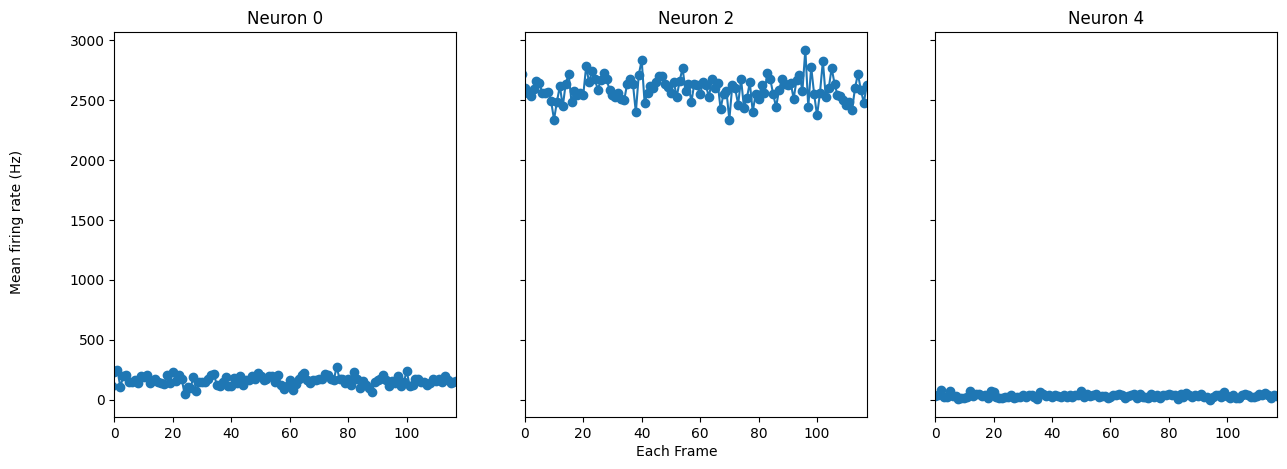

In [22]:
def image_tuning_curve(neuron_indices, spike_times, stimulus_table, bin_width=0.01, time_before=0.1, time_after=0.3):
    # Find the unique stimulus frames presented during the experiment
    unique_frames = np.unique(stimulus_table['frame'].values)

    # Create subplots for the given neuron indices
    fig, axes = plt.subplots(nrows=1, ncols=len(neuron_indices), figsize=(5 * len(neuron_indices), 5), sharey=True)

    # Loop through each neuron index
    for idx, neuron_index in enumerate(neuron_indices):
        # Get the unit ID for the given neuron index
        unit_id = unit_ids[neuron_index]
        # Retrieve the spike times for the given neuron
        unit_spike_times = spike_times[unit_id]

        # Initialize a list to store the mean firing rate for each stimulus frame
        mean_firing_rates = []

        # Loop through each unique stimulus frame
        for frame in unique_frames:
            # Create a mask to select rows with the current frame in the stimulus table
            frame_mask = stimulus_table['frame'] == frame
            # Get the presentation start times for the current frame
            presentation_start_times = stimulus_table.loc[frame_mask, 'start_time'].values

            # Align the spike times relative to each presentation start time
            aligned_spike_times = [unit_spike_times - t for t in presentation_start_times]
            # Concatenate all aligned spike times into a single array
            all_spikes = np.concatenate(aligned_spike_times)

            # Compute the spike counts within the specified time window
            spike_counts, _ = np.histogram(all_spikes, bins=[-time_before, time_after])
            # Calculate the mean firing rate for the current frame
            mean_firing_rate = np.mean(spike_counts) / (time_after - time_before)

            # Append the mean firing rate to the list
            mean_firing_rates.append(mean_firing_rate)

        # Plot the tuning curve
        axes[idx].plot(unique_frames, mean_firing_rates, marker='o')
        axes[idx].set_title(f"Neuron {neuron_index}")

    # Label the x-axis and y-axis
    fig.text(0.5, 0.04, 'Each Frame', ha='center', va='center')
    fig.text(0.06, 0.5, 'Mean firing rate (Hz)', ha='center', va='center', rotation='vertical')

    # Set x-axis limits
    for ax in axes:
        ax.set_xlim(0, unique_frames[-1])

    # Show the plot
    plt.show()

# Example
image_tuning_curve([0,  2, 4], spike_times, stimulus_table)


### Create a correlation matrix.

In [23]:
'''
# Only run if one doesn't have the "firing_rates_natural_scense.csv" dataset.
stimulus_table = session.get_stimulus_table("natural_scenes")

presentation_ids = np.unique(stimulus_table.index.values)
unit_ids = session.units.index.values

spike_times = session.spike_times

# Create a matrix to store firing rates: rows correspond to neurons, columns correspond to scenes
firing_rates = np.zeros((len(unit_ids), len(presentation_ids)))

# Loop through each neuron
for i, unit_id in enumerate(unit_ids):
    unit_spike_times = spike_times[unit_id]
    
    # Loop through each scene presentation
    for j, presentation_id in enumerate(presentation_ids):
        presentation_start_time = stimulus_table.loc[presentation_id]["start_time"]
        presentation_end_time = stimulus_table.loc[presentation_id]["stop_time"]

        # Get the spikes for the given neuron and scene
        spikes = np.logical_and(unit_spike_times >= presentation_start_time, unit_spike_times <= presentation_end_time)

        # Calculate the firing rate
        firing_rate = np.sum(spikes) / (presentation_end_time - presentation_start_time)
        firing_rates[i, j] = firing_rate
'''

'\n# Only run if one doesn\'t have the "firing_rates_natural_scense.csv" dataset.\nstimulus_table = session.get_stimulus_table("natural_scenes")\n\npresentation_ids = np.unique(stimulus_table.index.values)\nunit_ids = session.units.index.values\n\nspike_times = session.spike_times\n\n# Create a matrix to store firing rates: rows correspond to neurons, columns correspond to scenes\nfiring_rates = np.zeros((len(unit_ids), len(presentation_ids)))\n\n# Loop through each neuron\nfor i, unit_id in enumerate(unit_ids):\n    unit_spike_times = spike_times[unit_id]\n    \n    # Loop through each scene presentation\n    for j, presentation_id in enumerate(presentation_ids):\n        presentation_start_time = stimulus_table.loc[presentation_id]["start_time"]\n        presentation_end_time = stimulus_table.loc[presentation_id]["stop_time"]\n\n        # Get the spikes for the given neuron and scene\n        spikes = np.logical_and(unit_spike_times >= presentation_start_time, unit_spike_times <= pre

In [24]:
# Save the NumPy array to a CSV file
#np.savetxt("firing_rates_natural_scense.csv", firing_rates, delimiter=",")

In [25]:
# Load the CSV file back into a NumPy array
firing_rates = np.loadtxt("firing_rates_natural_scense.csv", delimiter=",")

print(firing_rates)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [35.97177796 19.98432109 19.98432109 ... 23.97902889 35.96994928
  15.98664413]
 ...
 [39.96864218 59.95296327 35.97177796 ... 23.97902889 15.98664413
   0.        ]
 [ 0.          7.99372844  3.99686422 ...  0.          0.
   0.        ]
 [ 3.99686422  3.99686422  0.         ...  0.          0.
   0.        ]]


In [26]:
import networkx as nx

# Firing rates for chosen scene.
scene_index = 0  # Choose a specific scene index

# Extract firing rates for the chosen scene
scene_firing_rates = firing_rates[:, scene_index]

print("Scene firing rates:")
print(scene_firing_rates)

print("Shape of scene_firing_rates:")
print(scene_firing_rates.shape)

# Reshape and transpose the scene_firing_rates array
scene_firing_rates = scene_firing_rates.reshape(-1, 1).T

print("Reshaped and transposed scene_firing_rates:")
print(scene_firing_rates)

print("Shape of reshaped and transposed scene_firing_rates:")
print(scene_firing_rates.shape)

# Calculate the correlation matrix
corr_matrix = np.corrcoef(scene_firing_rates)
print("Correlation matrix:")
print(corr_matrix)

### This function calculates the correlation coefficient between each pair of neurons in the input matrix X (in our case, firing rates).
def custom_corrcoef(X):
    # Calculate the mean of each row (neuron) in X
    mean_X = np.mean(X, axis=1, keepdims=True)
    # Calculate the standard deviation of each row (neuron) in X, and add a small constant (1e-9) to avoid division by zero
    std_X = np.std(X, axis=1, keepdims=True) + 1e-9
    # Normalize X by subtracting the mean and dividing by the standard deviation
    X_normalized = (X - mean_X) / std_X
    # Calculate the correlation coefficient matrix by taking the dot product of the normalized matrix and its transpose
    # Divide the result by the number of columns in X to normalize the sum
    return np.dot(X_normalized, X_normalized.T) / X.shape[1]


# Calculate the correlation matrix
corr_matrix = custom_corrcoef(firing_rates)
print("Correlation matrix:")
print(corr_matrix)


Scene firing rates:
[ 0.          0.         35.97177796 ... 39.96864218  0.
  3.99686422]
Shape of scene_firing_rates:
(2073,)
Reshaped and transposed scene_firing_rates:
[[ 0.          0.         35.97177796 ... 39.96864218  0.
   3.99686422]]
Shape of reshaped and transposed scene_firing_rates:
(1, 2073)
Correlation matrix:
1.0
Correlation matrix:
[[ 1.          0.0169351  -0.06794018 ... -0.06045444 -0.05240916
   0.07014787]
 [ 0.0169351   0.99999998  0.0129556  ...  0.01427055  0.01539093
   0.00935802]
 [-0.06794018  0.0129556   1.         ...  0.06579779  0.07517635
  -0.09472078]
 ...
 [-0.06045444  0.01427055  0.06579779 ...  1.          0.10752685
   0.16303927]
 [-0.05240916  0.01539093  0.07517635 ...  0.10752685  1.
   0.00902286]
 [ 0.07014787  0.00935802 -0.09472078 ...  0.16303927  0.00902286
   1.        ]]


Correlation matrix:
[[ 1.          0.0169351  -0.06794018 ... -0.06045444 -0.05240916
   0.07014787]
 [ 0.0169351   0.99999998  0.0129556  ...  0.01427055  0.01539093
   0.00935802]
 [-0.06794018  0.0129556   1.         ...  0.06579779  0.07517635
  -0.09472078]
 ...
 [-0.06045444  0.01427055  0.06579779 ...  1.          0.10752685
   0.16303927]
 [-0.05240916  0.01539093  0.07517635 ...  0.10752685  1.
   0.00902286]
 [ 0.07014787  0.00935802 -0.09472078 ...  0.16303927  0.00902286
   1.        ]]


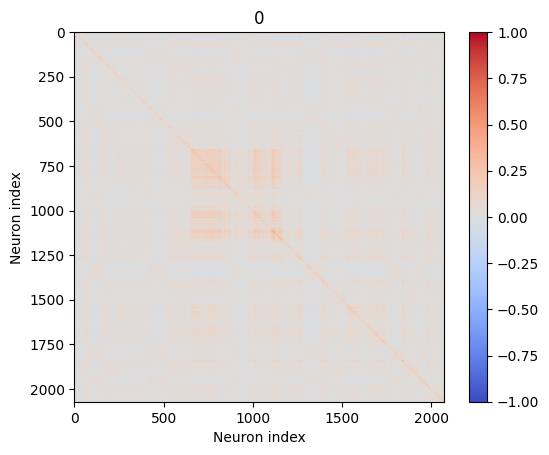

In [27]:
# Calculate the correlation matrix
corr_matrix = custom_corrcoef(firing_rates)
print("Correlation matrix:")
print(corr_matrix)

# Visualize the correlation matrix
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title(scene_index)
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show()


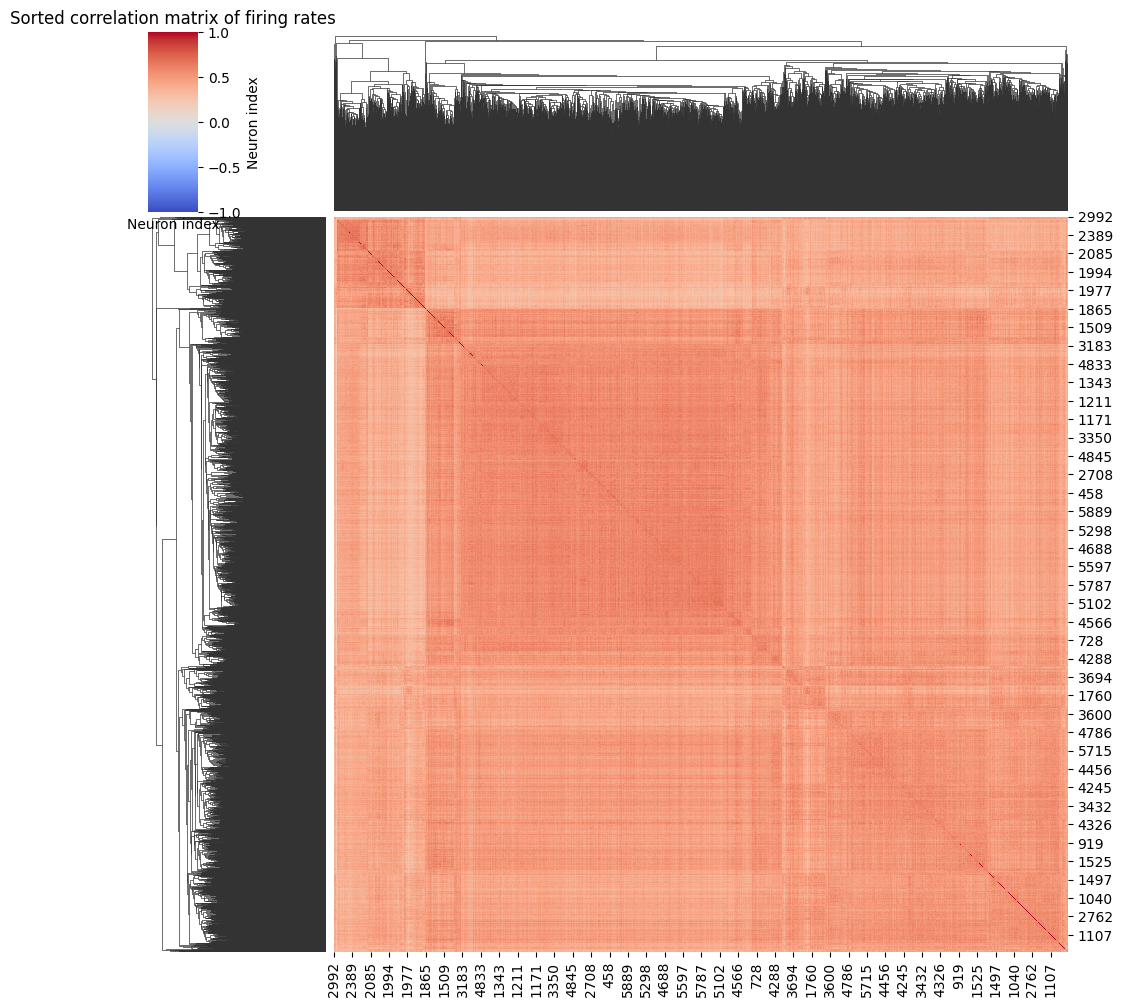

In [28]:
# RECHECK THIS CODE.
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Calculate the correlation matrix
corr_matrix = custom_corrcoef(firing_rates.T)

# Compute the hierarchical clustering
distance_matrix = 1 - np.abs(corr_matrix)
np.fill_diagonal(distance_matrix, 0)  # Set the diagonal to zero
linked = linkage(squareform(distance_matrix), method='average')

# Plot the heatmap with dendrogram-based sorting
sns.clustermap(corr_matrix, cmap='coolwarm', row_linkage=linked, col_linkage=linked, vmin=-1, vmax=1)
plt.title("Sorted correlation matrix of firing rates")
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show()

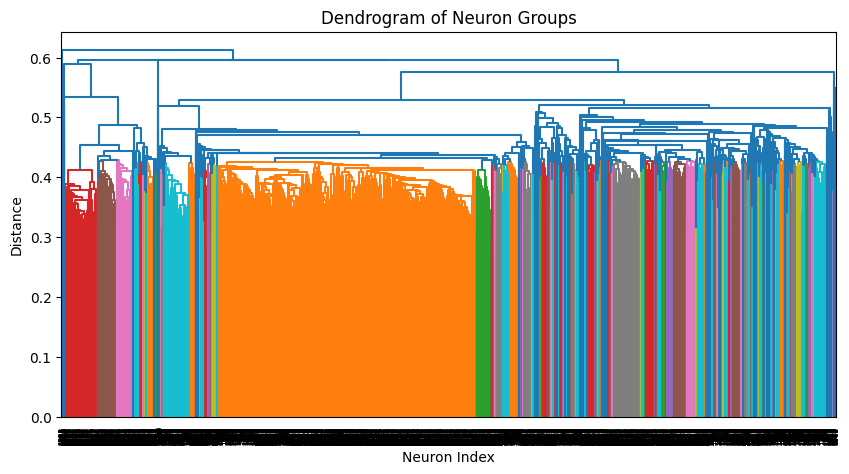

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Calculate the correlation matrix
corr_matrix = custom_corrcoef(firing_rates.T)

# Compute the hierarchical clustering
distance_matrix = 1 - np.abs(corr_matrix)
np.fill_diagonal(distance_matrix, 0)
linked = linkage(squareform(distance_matrix), method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram of Neuron Groups')
plt.xlabel('Neuron Index')
plt.ylabel('Distance')
plt.show()


### Try aligning spike times to stimuli

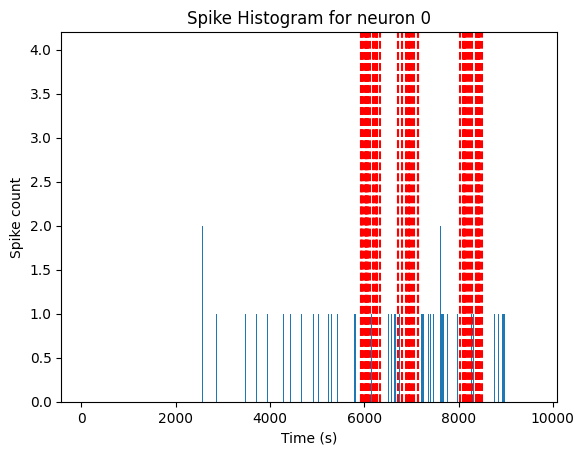

In [30]:
def plot_spike_histogram(neuron_index, spike_times, stimulus_table, image_id, bin_size=0.05):
    """
    Plots a spike histogram for the given neuron index and marks the stimulus time for a specific image.
    
    neuron_index: int, the index of the neuron in the spike_times array
    spike_times: dict, keys are neuron IDs, and values are arrays of spike times
    stimulus_table: DataFrame, contains the stimulus presentation information
    image_id: int, the ID of the image whose stimulus time you want to mark
    bin_size: float, the size of the bins for the histogram (in seconds)
    """
    # Get the spike times for the selected neuron
    unit_id = list(spike_times.keys())[neuron_index]
    unit_spike_times = spike_times[unit_id]

    # Find the stimulus presentation times for the specified image
    image_presentation_times = stimulus_table[stimulus_table['frame'] == image_id]['start_time'].values

    # Create the spike histogram
    n_bins = int((unit_spike_times[-1] - unit_spike_times[0]) / bin_size)
    hist, bin_edges = np.histogram(unit_spike_times, bins=n_bins)

    # Plot the spike histogram
    plt.bar(bin_edges[:-1], hist, width=bin_size, align='edge')
    plt.xlabel("Time (s)")
    plt.ylabel("Spike count")
    plt.title(f"Spike Histogram for neuron {neuron_index}")

    # Mark the stimulus presentation times for the specific image
    for t in image_presentation_times:
        plt.axvline(t, color='r', linestyle='--')

    plt.show()

# Example usage
neuron_index = 0
image_id = 20
plot_spike_histogram(neuron_index, spike_times, stimulus_table, image_id)


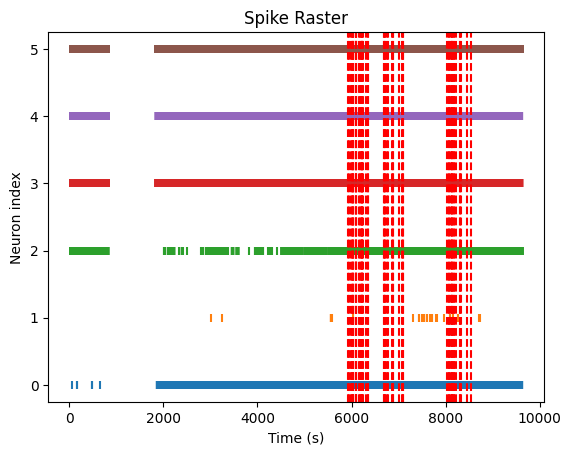

In [31]:
def plot_spike_raster(neuron_indices, spike_times, stimulus_table, image_id):
    """
    Plots a spike raster for the given neuron indices and marks the stimulus time for a specific image.
    
    neuron_indices: list of int, indices of neurons in the spike_times array
    spike_times: dict, keys are neuron IDs, and values are arrays of spike times
    stimulus_table: DataFrame, contains the stimulus presentation information
    image_id: int, the ID of the image whose stimulus time you want to mark
    """
    # Find the stimulus presentation times for the specified image
    image_presentation_times = stimulus_table[stimulus_table['frame'] == image_id]['start_time'].values

    # Plot spike raster
    plt.figure()
    for i, neuron_index in enumerate(neuron_indices):
        unit_id = list(spike_times.keys())[neuron_index]
        unit_spike_times = spike_times[unit_id]
        plt.scatter(unit_spike_times, np.ones_like(unit_spike_times) * i, marker='|')

    plt.xlabel("Time (s)")
    plt.ylabel("Neuron index")
    plt.title("Spike Raster")

    # Mark the stimulus presentation times for the specific image
    for t in image_presentation_times:
        plt.axvline(t, color='r', linestyle='--')

    plt.show()

# Example usage
neuron_indices = [0, 1, 2, 3, 4, 5]
image_id = 10
plot_spike_raster(neuron_indices, spike_times, stimulus_table, image_id)


### Find coordinates of each neuron

In [32]:
def get_unit_xyz_coordinates(session):
    """
    Get the XYZ coordinates of each neuron in the EcephysSession.

    Args:
        session (allensdk.brain_observatory.ecephys.ecephys_session.EcephysSession): The session object.

    Returns:
        pd.DataFrame: A DataFrame containing the unit number and XYZ coordinates.
    """

    # Initialize an empty list to store the unit number and XYZ coordinates
    unit_xyz_coordinates = []

    # Loop through each unit in the session.units DataFrame
    for unit_id, unit_data in session.units.iterrows():
        # Get the peak_channel_id from the unit_data
        channel_id = unit_data['peak_channel_id']
        
        # Retrieve the relevant row in the session.channels DataFrame using the peak_channel_id
        channel_data = session.channels.loc[channel_id]

        # Extract the probe_vertical_position (X), probe_horizontal_position (Y),
        # and left_right_ccf_coordinate (Z) from the channel_data
        x = channel_data['probe_vertical_position']
        y = channel_data['probe_horizontal_position']
        z = channel_data['left_right_ccf_coordinate']

        # Append the unit number (index) and XYZ coordinates to the list
        unit_xyz_coordinates.append([unit_id, x, y, z])

    # Create a DataFrame with the columns 'Unit Number', 'X', 'Y', and 'Z'
    columns = ['Unit Number', 'X', 'Y', 'Z']
    unit_xyz_df = pd.DataFrame(unit_xyz_coordinates, columns=columns)

    return unit_xyz_df

unit_xyz_df = get_unit_xyz_coordinates(session)
unit_xyz_df

Unit Number     X   Y       Z
0       950910332    40  27  6694.0
1       950910326    40  27  6694.0
2       950910319    40  27  6694.0
3       950910311    40  27  6694.0
4       950912689    60  11  6697.0
...           ...   ...  ..     ...
2068    950957020  1420  11  8749.0
2069    950957004  1420  11  8749.0
2070    950956952  1420  43  8746.0
2071    950957053  1440  59  8753.0
2072    950957039  1440  59  8753.0

[2073 rows x 4 columns]

In [33]:
channel_data = session.channels
channel_data

filtering  \
id                                                             
850261194  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850261196  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850261202  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850261206  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850261212  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
...                                                      ...   
850264894  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850264898  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850264902  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850264908  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
850264912  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   

           probe_channel_number  probe_horizontal_position   probe_id  \
id                                                                      
850261194                     0                         43  810755801   
850261196                     1                         11  810755801   
850261202                     4                         43  810755801   
850261206                     6                         59  810755801   
850261212                     9                         11  810755801   
...                         ...                        ...        ...   
850264894                   374                         59  810755797   
850264898                   376                         43  810755797   
850264902                   378                         59  810755797   
850264908                   381                         11  810755797   
850264912                   383                         27  810755797   

           probe_vertical_position structure_acronym  ecephys_structure_id  \
id                                                                           
850261194                       20                PO                1020.0   
850261196                       20                PO                1020.0   
850261202                       60                PO                1020.0   
850261206                       80                PO                1020.0   
850261212                      100                PO                1020.0   
...                            ...               ...                   ...   
850264894                     3760              None                   NaN   
850264898                     3780              None                   NaN   
850264902                     3800              None                   NaN   
850264908                     3820              None                   NaN   
850264912                     3840              None                   NaN   

          ecephys_structure_acronym  anterior_posterior_ccf_coordinate  \
id                                                                       
850261194                        PO                             7648.0   
850261196                        PO                             7651.0   
850261202                        PO                             7660.0   
850261206                        PO                             7665.0   
850261212                        PO                             7674.0   
...                             ...                                ...   
850264894                       NaN                             7112.0   
850264898                       NaN                             7107.0   
850264902                       NaN                             7102.0   
850264908                       NaN                             7094.0   
850264912                       NaN                             7089.0   

           dorsal_ventral_ccf_coordinate  left_right_ccf_coordinate  
id                                                                   
850261194                         3645.0                     7567.0  
850261196                         3636.0                     7566.0  
850261202 

### Plot all neurons.

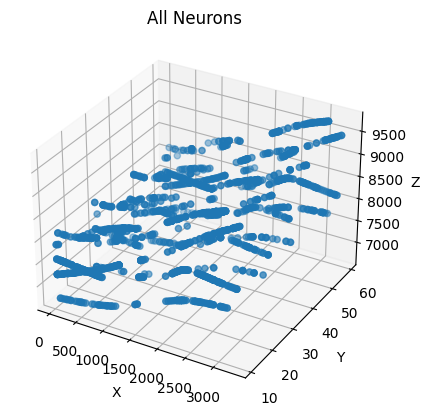

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_all_neurons(unit_xyz_df):
    # Plot the units' positions
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(unit_xyz_df['X'], unit_xyz_df['Y'], unit_xyz_df['Z'])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title("All Neurons")
    plt.show()

# Call the function with the unit_xyz_df DataFrame
plot_all_neurons(unit_xyz_df)


### Plot Neuons that fire them most given a specific image.


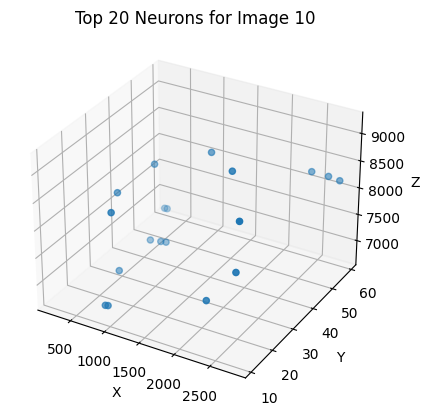

In [34]:
def plot_top_neurons_for_image(image_frame, top_n, spike_times, stimulus_table, unit_xyz_df, time_before, time_after):
    # Get the start times of the image presentations
    presentation_start_times = stimulus_table[stimulus_table['frame'] == image_frame]['start_time'].values

    unit_numbers = session.units.index.values
    mean_firing_rates = []
    for unit_id in unit_numbers:
        unit_spike_times = spike_times[unit_id]
        aligned_spike_times = [unit_spike_times - t for t in presentation_start_times]
        all_spikes = np.concatenate(aligned_spike_times)
        spike_counts, _ = np.histogram(all_spikes, bins=[-time_before, time_after])
        mean_firing_rate = np.mean(spike_counts) / (time_after - time_before)
        mean_firing_rates.append(mean_firing_rate)

    # Create a DataFrame with unit_ids and their mean firing rates
    firing_rate_df = pd.DataFrame({'unit_id': unit_numbers, 'mean_firing_rate': mean_firing_rates})

    # Sort the DataFrame by mean firing rate in descending order and take the top_n units
    top_units = firing_rate_df.sort_values(by='mean_firing_rate', ascending=False).head(top_n)

    # Merge the top_units DataFrame with the unit_xyz_df DataFrame
    top_unit_positions = top_units.merge(unit_xyz_df, left_on='unit_id', right_on='Unit Number')

    # Plot the units' positions
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(top_unit_positions['X'], top_unit_positions['Y'], top_unit_positions['Z'])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title(f"Top {top_n} Neurons for Image {image_frame}")
    plt.show()

image_frame = 10  # Set the desired image frame
top_n = 20  # Set the number of top neurons to display
time_before = 0.5  # Set the time before stimulus onset
time_after = 1.5   # Set the time after stimulus onset

plot_top_neurons_for_image(image_frame, top_n, spike_times, stimulus_table, unit_xyz_df, time_before, time_after)

### I need to further analyze the following code/visualization.
I am exploring them currently.

In [41]:
### Recheck every single one of these!
def get_psth(unit_spike_times, stimulus_table, time_bins):
    # Get the start times of all stimulus presentations
    presentation_start_times = stimulus_table['start_time'].values
    # Align the spike times of the neuron to the stimulus presentation times
    aligned_spike_times = [unit_spike_times - t for t in presentation_start_times]
    # Concatenate all the aligned spike times into a single array
    all_spikes = np.concatenate(aligned_spike_times)
    # Calculate the spike counts in each time bin
    spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
    # Calculate the average spike count per stimulus presentation in each time bin
    psth = spike_counts / len(presentation_start_times)
    return psth, time_bins


def plot_psth(neuron_index, spike_times, stimulus_table):
    """
    Plots the peri-stimulus time histogram (PSTH) for the given neuron index.
    
    neuron_index: int, the index of the neuron in the spike_times array
    spike_times: dict, keys are neuron IDs, and values are arrays of spike times
    stimulus_table: DataFrame, contains the stimulus presentation information
    """
    # Get the spike times for the selected neuron
    unit_id = list(spike_times.keys())[neuron_index]
    unit_spike_times = spike_times[unit_id]
    
    # Calculate the PSTH
    time_bins = np.arange(-0.1, 0.4, 0.01)  # Define time bins relative to the stimulus onset
    psth, _ = get_psth(unit_spike_times, stimulus_table, time_bins)

    # Plot the PSTH
    plt.plot(time_bins[:-1], psth)
    plt.xlabel("Time (s)")
    plt.ylabel("Firing rate (Hz)")
    plt.title(f"PSTH for neuron {neuron_index}")
    plt.show()
    
def plot_isi_distribution(neuron_index, spike_times):
    """
    Plots the inter-spike interval (ISI) distribution for the given neuron index.
    
    neuron_index: int, the index of the neuron in the spike_times array
    spike_times: dict, keys are neuron IDs, and values are arrays of spike times
    """
    # Get the spike times for the selected neuron
    unit_id = list(spike_times.keys())[neuron_index]
    unit_spike_times = spike_times[unit_id]

    # Calculate the ISI distribution
    isi = np.diff(unit_spike_times)

    # Plot the ISI distribution
    plt.hist(isi, bins=np.arange(0, 0.5, 0.01), density=True)
    plt.xlabel("ISI (s)")
    plt.ylabel("Probability density")
    plt.title(f"ISI Distribution for neuron {neuron_index}")
    plt.show()

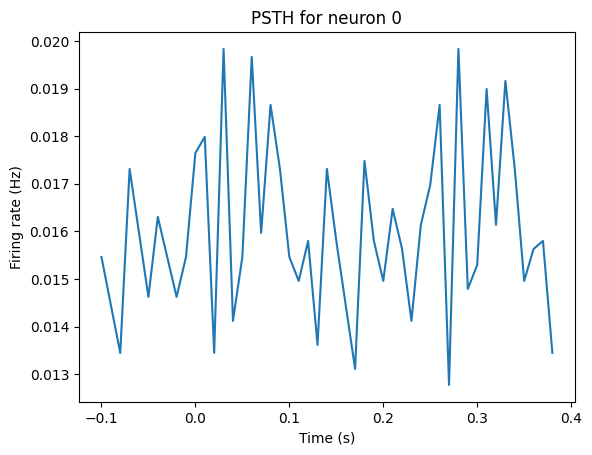

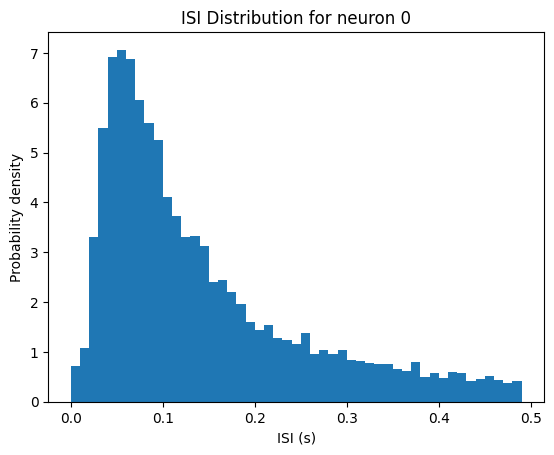

In [42]:
neuron_index = 0
plot_psth(neuron_index, spike_times, stimulus_table)
plot_isi_distribution(neuron_index, spike_times)